<h1>Airbnb listning analysis Project

<h2>Importing necssary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st 
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

<h2>Loding Dataset

In [10]:
data = pd.read_excel(r"C:\Data science\All Projects and Assignment\Excle projects\Project 5 Airbnb Listings.xlsx")

In [11]:
data

,No,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
0,1,San Francisco,City Center,Condominium,Entire home/apt,179.94,1,41,66.2,223,...,Entire home/apt,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
1,2,Boston,Downtown,Apartment,Private room,230.65,7,171,86.9,249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chicago,City Center,Loft,Shared room,415.40,4,31,83.9,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,San Francisco,Downtown,Townhouse,Private room,432.96,5,85,94.0,346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Chicago,Waterfront,Apartment,Entire home/apt,551.43,4,11,86.1,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,San Francisco,City Center,House,Shared room,528.53,9,3,87.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,Boston,Downtown,House,Shared room,399.68,9,164,81.7,359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,Boston,Suburbs,Loft,Shared room,488.72,7,75,84.3,276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,119,Chicago,Downtown,Condominium,Private room,372.36,8,92,87.4,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Understanding Data

- Each row = one airbnb listing
- Each column = an attributes of that listing

<h2>EDA (

In [12]:
data.shape

(120, 29)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   120 non-null    int64         
 1   city                 120 non-null    object        
 2   neighbourhood        120 non-null    object        
 3   property_type        120 non-null    object        
 4   room_type            120 non-null    object        
 5   price                120 non-null    float64       
 6   minimum_nights       120 non-null    int64         
 7   number_of_reviews    120 non-null    int64         
 8   review_score         120 non-null    float64       
 9   availability_365     120 non-null    int64         
 10  latitude             120 non-null    float64       
 11  longitude            120 non-null    float64       
 12  host_since           120 non-null    datetime64[ns]
 13  host_years           120 non-null  

In [14]:
data.describe()

,No,price,minimum_nights,number_of_reviews,review_score,availability_365,latitude,longitude,host_since,host_years,...,No.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
count,120.000000,120.000000,120.000000,120.000000,120.0000,120.000000,120.000000,120.000000,120,120.000000,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0
mean,60.500000,317.679917,5.633333,97.691667,80.3425,186.150000,38.955642,-95.186458,2019-01-24 19:36:00,6.441667,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
min,1.000000,36.260000,1.000000,1.000000,60.2000,4.000000,37.045308,-122.304128,2015-01-02 00:00:00,2.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
25%,30.750000,189.352500,3.000000,41.000000,69.4500,97.500000,38.058972,-108.120853,2017-02-12 00:00:00,4.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
50%,60.500000,333.490000,6.000000,95.500000,81.9500,192.500000,38.939008,-94.141595,2018-12-12 12:00:00,7.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
75%,90.250000,456.322500,8.250000,145.000000,91.6750,269.750000,39.881512,-82.808266,2021-02-17 00:00:00,8.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
max,120.000000,591.150000,10.000000,199.000000,100.0000,359.000000,40.899406,-71.317277,2023-03-01 00:00:00,10.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
std,34.785054,161.425635,2.989993,58.610636,12.1976,105.957709,1.095984,15.060265,NaN,2.339992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.dtypes

No                              int64
city                           object
neighbourhood                  object
property_type                  object
room_type                      object
price                         float64
minimum_nights                  int64
number_of_reviews               int64
review_score                  float64
availability_365                int64
latitude                      float64
longitude                     float64
host_since             datetime64[ns]
host_years                      int64
Unnamed: 14                   float64
No.1                          float64
city.1                         object
neighbourhood.1                object
property_type.1                object
room_type.1                    object
price.1                       float64
minimum_nights.1              float64
number_of_reviews.1           float64
review_score.1                float64
availability_365.1            float64
latitude.1                    float64
longitude.1 

In [16]:
data.head()

,No,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
0,1,San Francisco,City Center,Condominium,Entire home/apt,179.94,1,41,66.2,223,...,Entire home/apt,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
1,2,Boston,Downtown,Apartment,Private room,230.65,7,171,86.9,249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chicago,City Center,Loft,Shared room,415.40,4,31,83.9,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,San Francisco,Downtown,Townhouse,Private room,432.96,5,85,94.0,346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Chicago,Waterfront,Apartment,Entire home/apt,551.43,4,11,86.1,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.sample()

,No,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
72,73,San Francisco,Suburbs,Condominium,Entire home/apt,432.11,5,85,98.1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.tail()

,No,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
115,116,San Francisco,City Center,House,Shared room,528.53,9,3,87.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,Boston,Downtown,House,Shared room,399.68,9,164,81.7,359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,Boston,Suburbs,Loft,Shared room,488.72,7,75,84.3,276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,119,Chicago,Downtown,Condominium,Private room,372.36,8,92,87.4,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,120,San Francisco,Waterfront,Apartment,Entire home/apt,145.24,8,94,68.7,232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.nunique()

No                     120
city                     5
neighbourhood            5
property_type            5
room_type                3
price                  120
minimum_nights          10
number_of_reviews       90
review_score           101
availability_365       101
latitude               120
longitude              120
host_since             117
host_years               9
Unnamed: 14              0
No.1                     1
city.1                   6
neighbourhood.1          5
property_type.1          1
room_type.1              1
price.1                  1
minimum_nights.1         1
number_of_reviews.1      1
review_score.1           1
availability_365.1       1
latitude.1               1
longitude.1              1
host_since.1             1
host_years.1             1
dtype: int64

In [20]:
numeric_columns=data.select_dtypes(['int64','float64'])
numeric_columns

,No,price,minimum_nights,number_of_reviews,review_score,availability_365,latitude,longitude,host_years,Unnamed: 14,No.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
0,1,179.94,1,41,66.2,223,39.383949,-112.122774,5,NaN,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
1,2,230.65,7,171,86.9,249,38.012177,-76.070411,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,415.40,4,31,83.9,35,37.582870,-106.424718,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,432.96,5,85,94.0,346,38.932787,-78.032835,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,551.43,4,11,86.1,236,39.557027,-96.398916,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,528.53,9,3,87.0,58,38.854993,-72.697449,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,399.68,9,164,81.7,359,39.601603,-117.734762,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,488.72,7,75,84.3,276,40.791215,-91.263664,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,119,372.36,8,92,87.4,99,37.653643,-82.759721,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
numeric_columns.columns

Index(['No', 'price', 'minimum_nights', 'number_of_reviews', 'review_score',
       'availability_365', 'latitude', 'longitude', 'host_years',
       'Unnamed: 14', 'No.1', 'price.1', 'minimum_nights.1',
       'number_of_reviews.1', 'review_score.1', 'availability_365.1',
       'latitude.1', 'longitude.1', 'host_since.1', 'host_years.1'],
      dtype='object')

In [22]:
categorical_columns=data.select_dtypes(['object'])
categorical_columns

,city,neighbourhood,property_type,room_type,city.1,neighbourhood.1,property_type.1,room_type.1
0,San Francisco,City Center,Condominium,Entire home/apt,San Francisco,City Center,Condominium,Entire home/apt
1,Boston,Downtown,Apartment,Private room,NaN,NaN,NaN,NaN
2,Chicago,City Center,Loft,Shared room,For better uderstanding By using xlookup,NaN,NaN,NaN
3,San Francisco,Downtown,Townhouse,Private room,NaN,NaN,NaN,NaN
4,Chicago,Waterfront,Apartment,Entire home/apt,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
115,San Francisco,City Center,House,Shared room,NaN,NaN,NaN,NaN
116,Boston,Downtown,House,Shared room,NaN,NaN,NaN,NaN
117,Boston,Suburbs,Loft,Shared room,NaN,NaN,NaN,NaN
118,Chicago,Downtown,Condominium,Private room,NaN,NaN,NaN,NaN


In [23]:
categorical_columns.columns

Index(['city', 'neighbourhood', 'property_type', 'room_type', 'city.1',
       'neighbourhood.1', 'property_type.1', 'room_type.1'],
      dtype='object')

<h2>Handling Null Values

In [24]:
data.isnull().sum()

No                       0
city                     0
neighbourhood            0
property_type            0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
review_score             0
availability_365         0
latitude                 0
longitude                0
host_since               0
host_years               0
Unnamed: 14            120
No.1                   119
city.1                 114
neighbourhood.1        115
property_type.1        119
room_type.1            119
price.1                119
minimum_nights.1       119
number_of_reviews.1    119
review_score.1         119
availability_365.1     119
latitude.1             119
longitude.1            119
host_since.1           119
host_years.1           119
dtype: int64

In [25]:
data.columns

Index(['No', 'city', 'neighbourhood', 'property_type', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'review_score',
       'availability_365', 'latitude', 'longitude', 'host_since', 'host_years',
       'Unnamed: 14', 'No.1', 'city.1', 'neighbourhood.1', 'property_type.1',
       'room_type.1', 'price.1', 'minimum_nights.1', 'number_of_reviews.1',
       'review_score.1', 'availability_365.1', 'latitude.1', 'longitude.1',
       'host_since.1', 'host_years.1'],
      dtype='object')

In [26]:
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [27]:
data = data.dropna(subset=['price', 'latitude', 'longitude'])

In [28]:
data['review_score'] = data['review_score'].fillna(data['review_score'].mean())
data['number_of_reviews'] = data['number_of_reviews'].fillna(0)
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')

In [29]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['minimum_nights'] = data['minimum_nights'].astype(int)
data['availability_365'] = data['availability_365'].astype(int)

In [30]:
data['host_years'] = pd.Timestamp.now().year - data['host_since'].dt.year
data['host_years'] = data['host_years'].fillna(0).astype(int)

In [31]:
data = data.drop_duplicates()

In [32]:
print("Final Shape after Cleaning:", data.shape)
display(data.describe())
display(data.head())

Final Shape after Cleaning: (120, 29)


,no,price,minimum_nights,number_of_reviews,review_score,availability_365,latitude,longitude,host_since,host_years,...,no.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
count,120.000000,120.000000,120.000000,120.000000,120.0000,120.000000,120.000000,120.000000,120,120.000000,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0
mean,60.500000,317.679917,5.633333,97.691667,80.3425,186.150000,38.955642,-95.186458,2019-01-24 19:36:00,6.441667,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
min,1.000000,36.260000,1.000000,1.000000,60.2000,4.000000,37.045308,-122.304128,2015-01-02 00:00:00,2.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
25%,30.750000,189.352500,3.000000,41.000000,69.4500,97.500000,38.058972,-108.120853,2017-02-12 00:00:00,4.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
50%,60.500000,333.490000,6.000000,95.500000,81.9500,192.500000,38.939008,-94.141595,2018-12-12 12:00:00,7.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
75%,90.250000,456.322500,8.250000,145.000000,91.6750,269.750000,39.881512,-82.808266,2021-02-17 00:00:00,8.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
max,120.000000,591.150000,10.000000,199.000000,100.0000,359.000000,40.899406,-71.317277,2023-03-01 00:00:00,10.000000,...,1.0,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
std,34.785054,161.425635,2.989993,58.610636,12.1976,105.957709,1.095984,15.060265,NaN,2.339992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,no,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
0,1,San Francisco,City Center,Condominium,Entire home/apt,179.94,1,41,66.2,223,...,Entire home/apt,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
1,2,Boston,Downtown,Apartment,Private room,230.65,7,171,86.9,249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chicago,City Center,Loft,Shared room,415.40,4,31,83.9,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,San Francisco,Downtown,Townhouse,Private room,432.96,5,85,94.0,346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Chicago,Waterfront,Apartment,Entire home/apt,551.43,4,11,86.1,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.to_csv(r"C:\Users\Atharv\Downloads\Airbnb.xlsx", index=False)

In [34]:
data

,no,city,neighbourhood,property_type,room_type,price,minimum_nights,number_of_reviews,review_score,availability_365,...,room_type.1,price.1,minimum_nights.1,number_of_reviews.1,review_score.1,availability_365.1,latitude.1,longitude.1,host_since.1,host_years.1
0,1,San Francisco,City Center,Condominium,Entire home/apt,179.94,1,41,66.2,223,...,Entire home/apt,179.94,1.0,41.0,66.2,223.0,39.383949,-112.122774,44149.0,5.0
1,2,Boston,Downtown,Apartment,Private room,230.65,7,171,86.9,249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chicago,City Center,Loft,Shared room,415.40,4,31,83.9,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,San Francisco,Downtown,Townhouse,Private room,432.96,5,85,94.0,346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Chicago,Waterfront,Apartment,Entire home/apt,551.43,4,11,86.1,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,San Francisco,City Center,House,Shared room,528.53,9,3,87.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,Boston,Downtown,House,Shared room,399.68,9,164,81.7,359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,Boston,Suburbs,Loft,Shared room,488.72,7,75,84.3,276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,119,Chicago,Downtown,Condominium,Private room,372.36,8,92,87.4,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


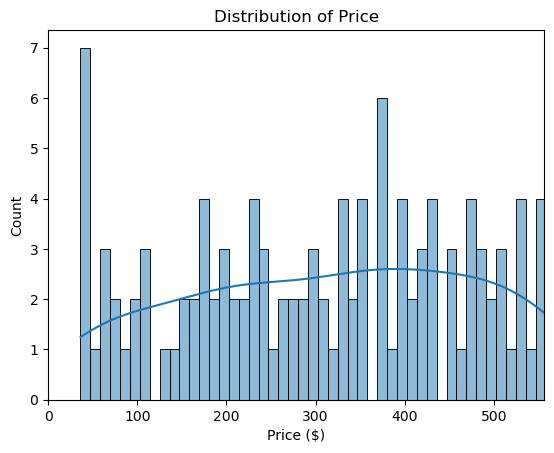

In [35]:
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.xlim(0, data['price'].quantile(0.95))  
plt.show()

In [36]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'review_score', 'availability_365', 'host_years']
correlation = data[numeric_cols].corr()

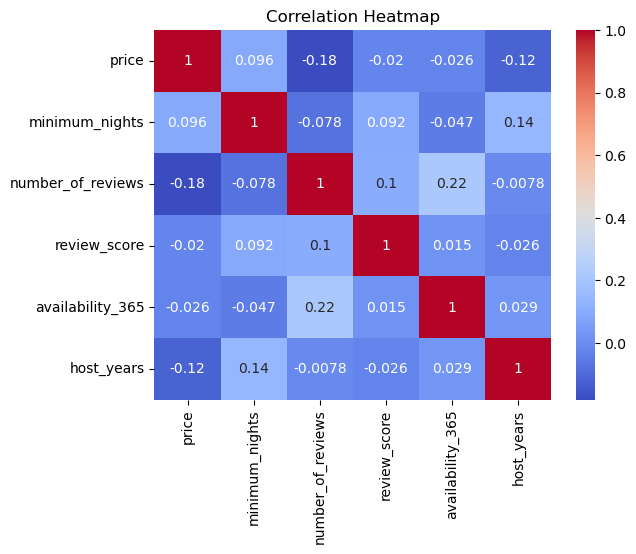

In [37]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

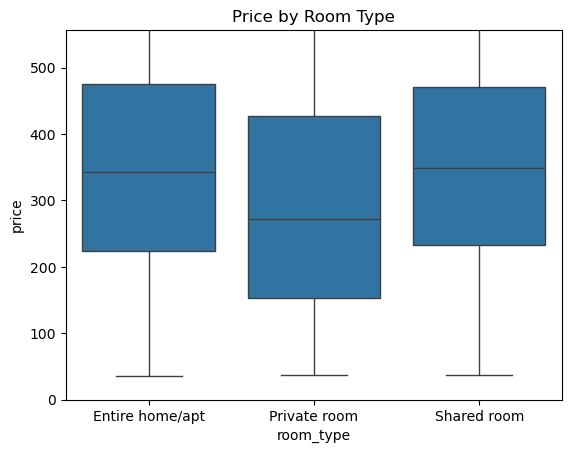

In [38]:
sns.boxplot(data=data, x='room_type', y='price')
plt.title('Price by Room Type')
plt.ylim(0, data['price'].quantile(0.95))
plt.show()

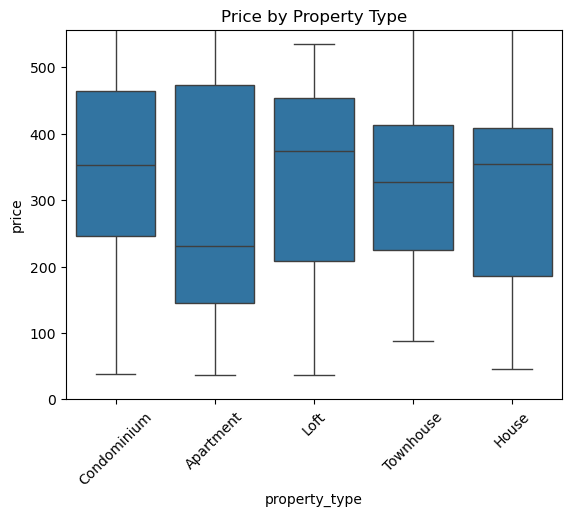

In [39]:
top_props = data['property_type'].value_counts().nlargest(6).index
sns.boxplot(data=data[data['property_type'].isin(top_props)],
            x='property_type', y='price')
plt.title('Price by Property Type')
plt.xticks(rotation=45)
plt.ylim(0, data['price'].quantile(0.95))
plt.show()

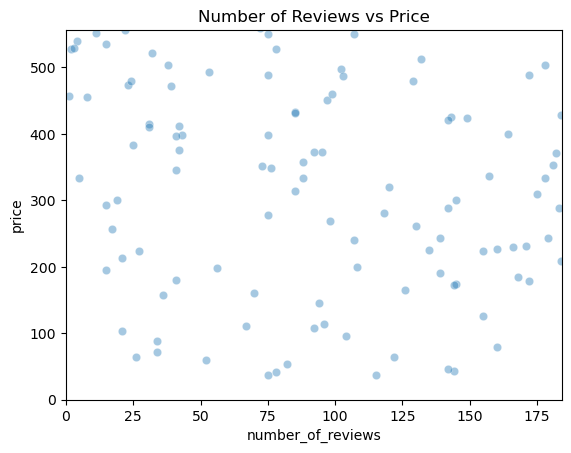

In [40]:
sns.scatterplot(data=data, x='number_of_reviews', y='price', alpha=0.4)
plt.title('Number of Reviews vs Price')
plt.xlim(0, data['number_of_reviews'].quantile(0.95))
plt.ylim(0, data['price'].quantile(0.95))
plt.show()

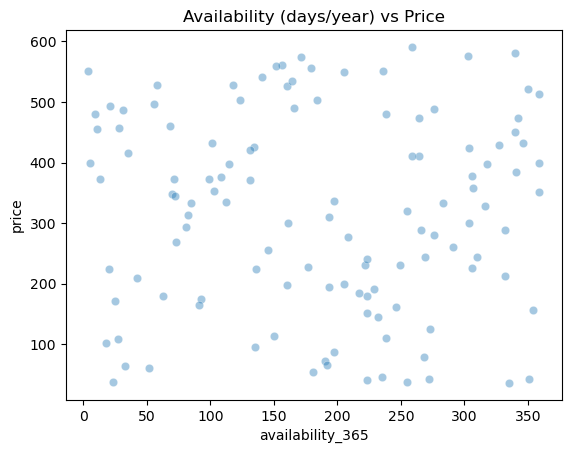

In [41]:
sns.scatterplot(data=data, x='availability_365', y='price', alpha=0.4)
plt.title('Availability (days/year) vs Price')
plt.show()

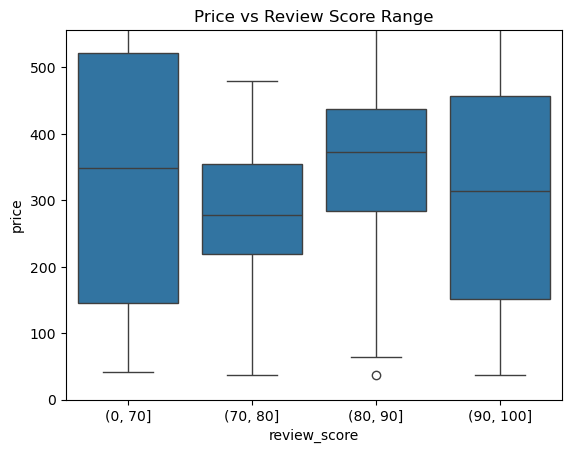

In [42]:
sns.boxplot(data=data, x=pd.cut(data['review_score'], bins=[0, 70, 80, 90, 100]),
            y='price')
plt.title('Price vs Review Score Range')
plt.ylim(0, data['price'].quantile(0.95))
plt.show()

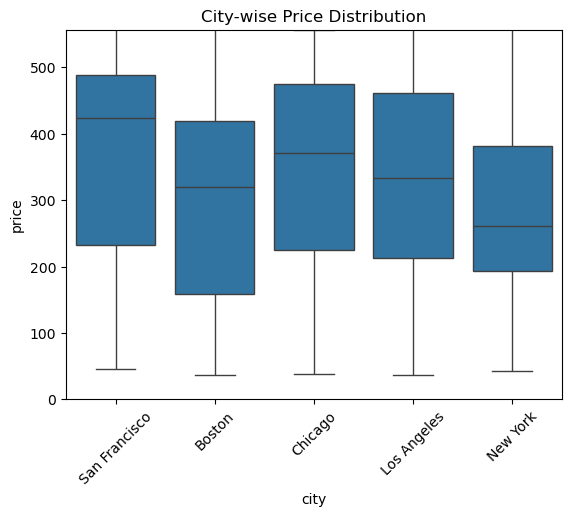

In [43]:
if data['city'].nunique() > 1:
    sns.boxplot(data=data, x='city', y='price')
    plt.title('City-wise Price Distribution')
    plt.xticks(rotation=45)
    plt.ylim(0, data['price'].quantile(0.95))
    plt.show()

<h2>Geospatial

In [44]:
!pip install folium

In [45]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv(r"C:\Users\Atharv\Downloads\Airbnb.xlsx")
print("Data Loaded:", data.shape)

Data Loaded: (120, 29)


In [47]:
data_map = data[data['price'] <= data['price'].quantile(0.95)].copy()

In [48]:
default_location = [data_map['latitude'].mean(), data_map['longitude'].mean()]
base_map = folium.Map(location=default_location, zoom_start=11)

In [49]:
heat_price = data_map[['latitude', 'longitude', 'price']].dropna()
heat_data = [[row['latitude'], row['longitude'], row['price']] for _, row in heat_price.iterrows()]

In [50]:
HeatMap(heat_data, radius=10, max_zoom=13).add_to(base_map)
base_map.save(r"C:\Users\Atharv\Downloads\Airbnb.xlsx")
print("✅ Saved: city_price_heatmap.html")

✅ Saved: city_price_heatmap.html


In [51]:
heat_demand = data_map[['latitude', 'longitude', 'number_of_reviews']].dropna()
demand_data = [[row['latitude'], row['longitude'], row['number_of_reviews']] for _, row in heat_demand.iterrows()]

In [52]:
demand_map = folium.Map(location=default_location, zoom_start=11)
HeatMap(demand_data, radius=10, max_zoom=13).add_to(demand_map)
demand_map.save(r"C:\Users\Atharv\Downloads\Airbnb.xlsx")
print("✅ Saved: city_demand_heatmap.html")

✅ Saved: city_demand_heatmap.html


In [53]:
sample_map = folium.Map(location=default_location, zoom_start=12)

for _, row in data_map.sample(100).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"${row['price']} - {row['room_type']}",
        fill=True,
        fill_opacity=0.7
    ).add_to(sample_map)

sample_map.save(r"C:\Users\Atharv\Downloads\Airbnb.xlsx")
print("✅ Saved: listing_points_sample.html")

✅ Saved: listing_points_sample.html


<h2>Modling

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [55]:
features = ['room_type', 'property_type', 'minimum_nights', 'availability_365',
            'number_of_reviews', 'review_score', 'host_years', 'city']
target = 'price'

In [56]:
data_model = data[features + [target]].dropna()
print("Model Data Shape:", data_model.shape)

Model Data Shape: (120, 9)


In [57]:
X = data_model[features]
y = data_model[target]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [59]:
numeric_features = ['minimum_nights', 'availability_365', 'number_of_reviews',
                    'review_score', 'host_years']
categorical_features = ['room_type', 'property_type', 'city']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [60]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [61]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌳 Random Forest Results")
print(f"MAE: ${mae_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

🌳 Random Forest Results
MAE: $160.72
R²: -0.269


In [62]:
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n📈 Linear Regression Results")
print(f"MAE: ${mae_lr:.2f}")
print(f"R²: {r2_lr:.3f}")


📈 Linear Regression Results
MAE: $166.37
R²: -0.382


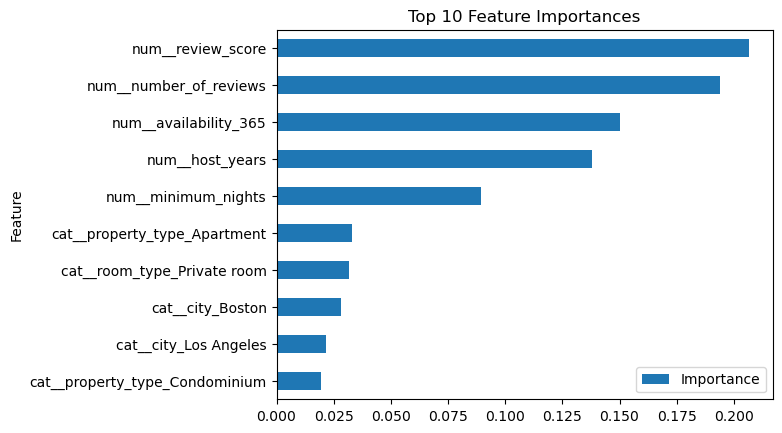

In [63]:
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocess'].get_feature_names_out()

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df.head(10).plot(x='Feature', y='Importance', kind='barh', title='Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [64]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [66]:
import mysql.connector as connector
import pandas as pd

In [67]:
pip install pymysql sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [68]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
password = quote_plus("atharv@5104")  # ✅ auto-encode
host = "localhost"
port = "3306"
database = "Airbnb_listing_analysis"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

engine.connect()
print("MySQL connected successfully")


MySQL connected successfully


In [70]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
password = quote_plus("atharv@5104")
host = "localhost"
port = "3306"
database = "Airbnb_listing_analysis"   # 🔥 must exist

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

engine.connect()
print("MySQL connected successfully")

data.to_sql("customer", engine, if_exists="replace", index=False)
print("Table created successfully")

MySQL connected successfully
Table created successfully
